## Decision trees with the UCI Adult dataset 

### The "Adult" dataset

In [1]:
path_train = "./data/adult_train.csv"
path_test = "./data/adult_test.csv"

#### Dataset description:

UCI Adult: classify people using demographical data - whether they earn more than \$50,000 per year or not.

Dataset is in `data` folder

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**Categorical Attributes**

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

**Continuous Attributes**

age: continuous. Age of an individual

fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

Individual's working hour per week

**Target** – earnings level, categorical (binary) feature.

#### 1. Reading train and test data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv(path_train, sep=';')
train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test = pd.read_csv(path_test, sep=';')
test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16282 non-null  object 
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [7]:
# necessary to remove rows with incorrect labels in test dataset
test['Age'] = test['Age'].astype(np.int64)

ValueError: invalid literal for int() with base 10: '|1x3 Cross validator'

In [8]:
test[test['Age'] == '|1x3 Cross validator']

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# necessary to remove rows with incorrect labels in test dataset
test.drop(test[test['Age'] == '|1x3 Cross validator'].index, inplace=True)

In [10]:
test[test['Age'] == '|1x3 Cross validator']

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target


In [235]:
test['Age'] = test['Age'].astype(np.int64)

In [236]:
test['Age'].dtype == train['Age'].dtype

True

In [237]:
# elimina los target de test que no sean >50K. o <=50K.
print(test['Target'].unique())
test[(test['Target'] == ' >50K.')]

[' <=50K.' ' >50K.']


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
8,63,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
11,65,Private,184454.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418.0,0.0,40.0,United-States,>50K.
15,48,Private,279724.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103.0,0.0,48.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16255,38,Private,149347.0,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,>50K.
16256,43,Local-gov,23157.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,1902.0,50.0,United-States,>50K.
16262,40,Private,202168.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024.0,0.0,55.0,United-States,>50K.
16266,50,Local-gov,139347.0,Masters,14.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,NaN,>50K.


In [238]:
test[(test['Target'] == ' <=50K.')]

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29,NaN,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.


In [239]:
test['Target'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

#### 2. Enconde
Encode target as
```
<=50K ---> 0

>50K -----> 1
```

In [240]:
#Label encoding 'test'
test['Target'] = np.where( test['Target'] == ' >50K.', 1, 0)

In [241]:
test['Target'].unique()

array([0, 1])

In [242]:
train['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [243]:
print(train['Target'].unique())

(train['Target'] == ' >50K').sum()

[' <=50K' ' >50K']


7841

In [244]:
# Label encoding 'train'
train['Target'] = np.where( train['Target'] ==  ' >50K', 1, 0)

In [245]:
train['Target'].sum()

7841

#### 3. Primary data analysis
1. Get a description in one unique table of all features and target of train
2. Get the value counts of target
3. Plot a grid of histograms of all columns (categorical included).

In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [247]:
train.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


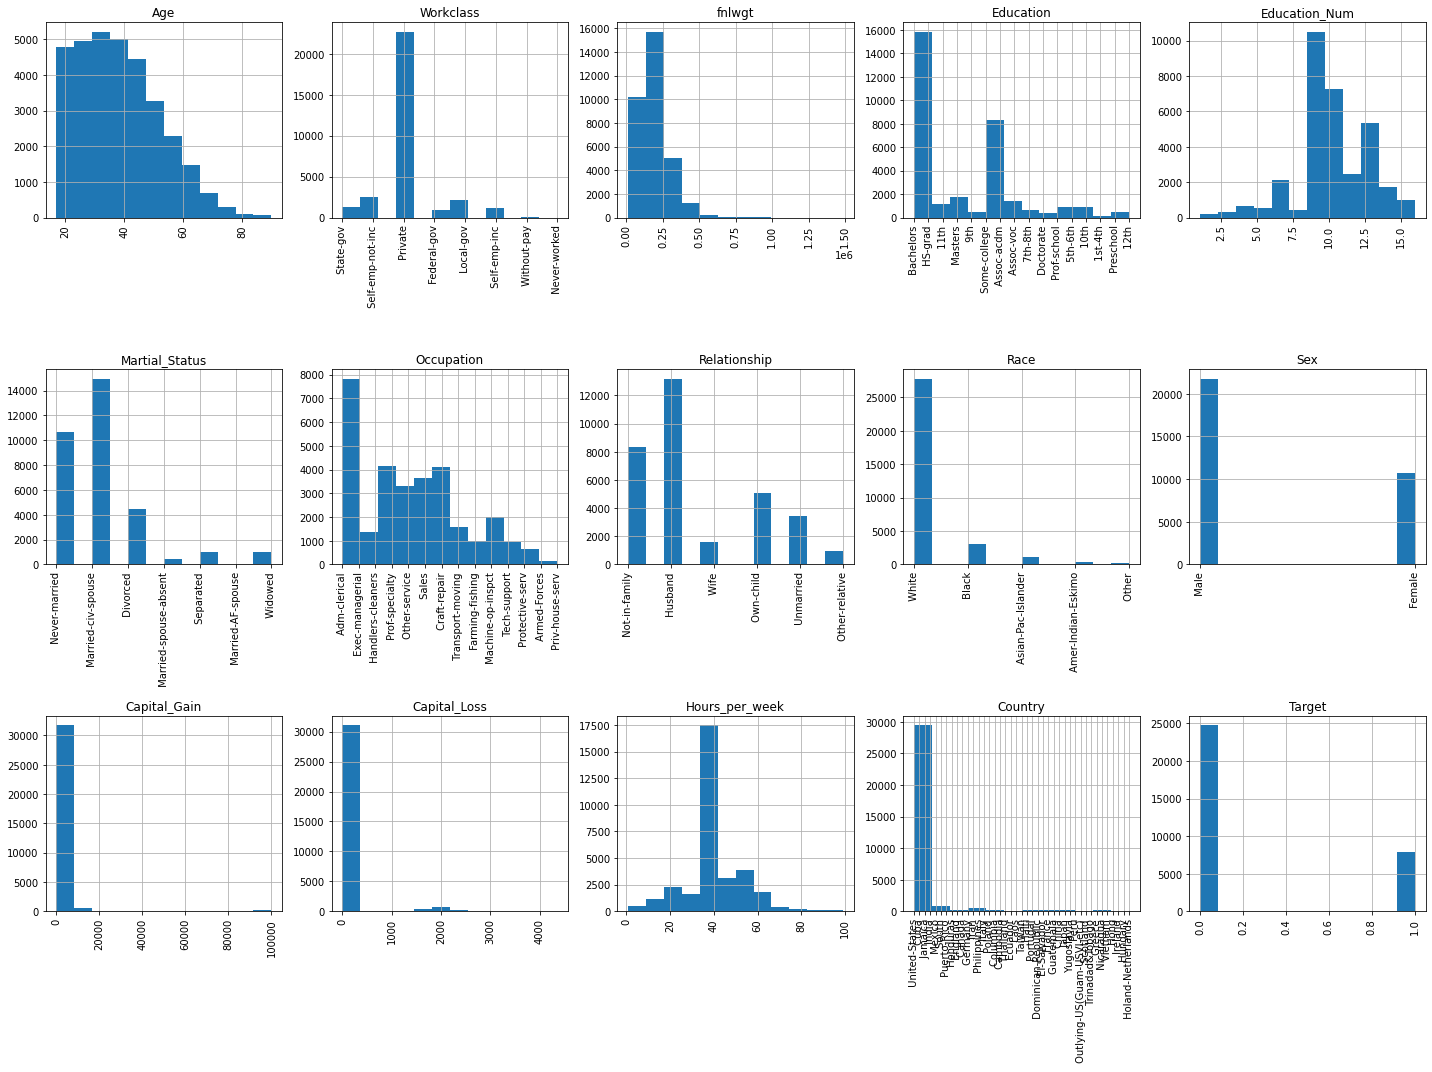

In [101]:
fig = plt.figure(figsize=(20,15))
for i, var in enumerate(train):
    plt.subplot(3,5,i+1)
    train[var].hist(bins = 12)
    plt.xticks(rotation=90)
    plt.title(var)

plt.tight_layout()
plt.show()

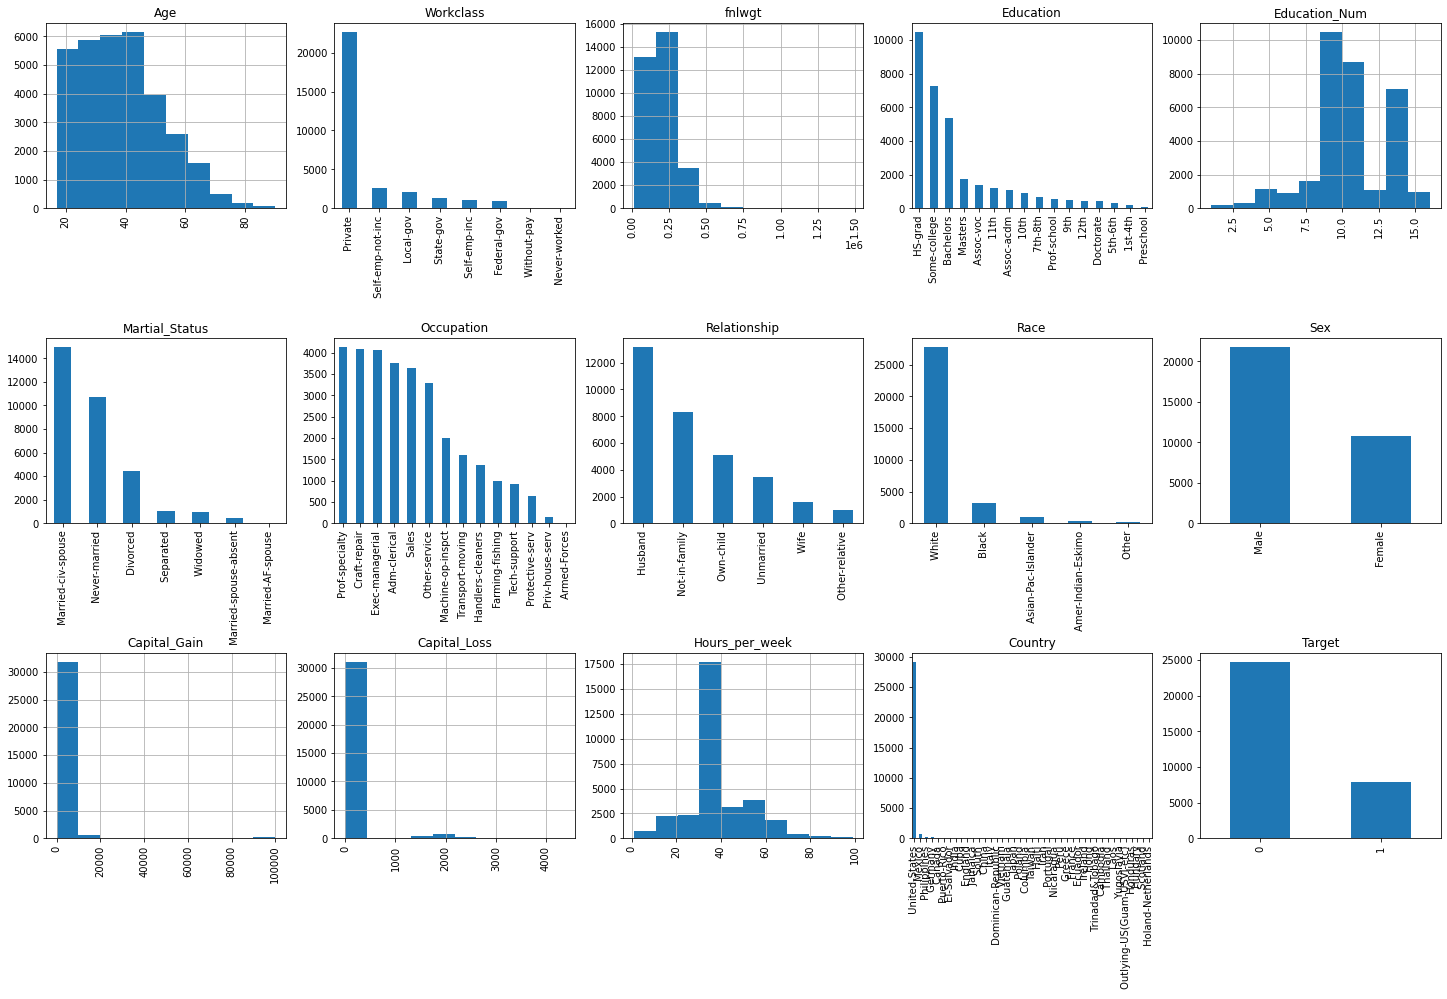

#### 4. Checking data types
1. Check the types of train and test. ¿Any difference?
2. There is an int feature in train, that is considered as object in test. Solve it
3. Cast all numeric types to the numeric types of the train

In [248]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [249]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  int64  
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 1.9+ MB


In [250]:
train.columns[1:]

Index(['Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [251]:
#Equelize type Series train/test ==> 'float64'
for col in train.columns[1:]:
    #print(train[col].dtype)
    if train[col].dtype == np.int64:
        print(train[col].dtype)
        arr_temp = train[col].to_numpy()
        arr_temp = arr_temp.astype(float)
        #train[col].astype(np.float64)
        train[col] = arr_temp
        print(train[col].dtype,'\n')

int64
float64 

int64
float64 

int64
float64 

int64
float64 

int64
float64 



In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32561 non-null  int64  
 1   Workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   Education       32561 non-null  object 
 4   Education_Num   32561 non-null  float64
 5   Martial_Status  32561 non-null  object 
 6   Occupation      30718 non-null  object 
 7   Relationship    32561 non-null  object 
 8   Race            32561 non-null  object 
 9   Sex             32561 non-null  object 
 10  Capital_Gain    32561 non-null  float64
 11  Capital_Loss    32561 non-null  float64
 12  Hours_per_week  32561 non-null  float64
 13  Country         31978 non-null  object 
 14  Target          32561 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 3.6+ MB


In [253]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  int64  
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 1.9+ MB


#### 5. Missing data
1. Fill in missing data for continuous features with their median values
2. Fill in missing data for categorical features with their mode.

In [254]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [255]:
test.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64

In [256]:
train.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [257]:
train.columns


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [258]:
#1. Fill in missing data for continuous features with their median values
continue_features = ['Age','fnlwgt','Capital_Gain','Capital_Loss', 'Hours_per_week']


In [259]:
for col in continue_features:
    print(train[col].median())
    train[col].fillna(train[col].median(), inplace=True)

37.0
178356.0
0.0
0.0
40.0


In [260]:
#
# IMPORTANTE---- EL FILLNA EN TEST ===> DEBE SER EL ''MISMO VALOR'' QUE SE SUSTITUYE EN TRAIN¿?¿?¿
#

for col in continue_features:
    print(train[col].median())
    test[col].fillna(train[col].median(), inplace=True)

37.0
178356.0
0.0
0.0
40.0


In [261]:
#2. Fill in missing data for categorical features with their mode.
categorical_features = ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

In [262]:
test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,0
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,0
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,0
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,0


In [263]:
# Fill Nan with df_train
for col in categorical_features:
    print(train[col].mode().values[0],'\n')
    train[col].fillna(train[col].mode().values[0], inplace=True)

 Private 

 HS-grad 

 Married-civ-spouse 

 Prof-specialty 

 Husband 

 White 

 Male 

 United-States 



In [264]:
train.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [265]:
#
# IMPORTANTE---- EL FILLNA EN TEST ===> DEBE SER EL MISMO VALOR QUE SE SUSTITUYE EN TRAIN¿?¿?¿
#

# Fill Nan with df_test
for col in categorical_features:
    print(train[col].mode().values[0],'\n')
    test[col].fillna(train[col].mode().values[0], inplace=True)

 Private 

 HS-grad 

 Married-civ-spouse 

 Prof-specialty 

 Husband 

 White 

 Male 

 United-States 



In [266]:
test.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

#### 6. Encodig categorical
Enconde with dummies all the categorical features

In [267]:
dummies_train = pd.get_dummies(train, columns=categorical_features, drop_first=True)
dummies_train.head(10)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409.0,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37,284582.0,14.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,49,160187.0,5.0,0.0,0.0,16.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52,209642.0,9.0,0.0,0.0,45.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781.0,14.0,14084.0,0.0,50.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,42,159449.0,13.0,5178.0,0.0,40.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [268]:
dummies_test = pd.get_dummies(test, columns=categorical_features, drop_first=True)
dummies_test.tail(10)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
16272,61,89686.0,9.0,0.0,0.0,48.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16273,31,440129.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16274,25,350977.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16275,48,349230.0,14.0,0.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16276,33,245211.0,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16277,39,215419.0,13.0,0.0,0.0,36.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16278,64,321403.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16279,38,374983.0,13.0,0.0,0.0,50.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16280,44,83891.0,13.0,5455.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16281,35,182148.0,13.0,0.0,0.0,60.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 7. Check for any inconsistency in the columns of train and test

In [269]:
dummies_train.shape, dummies_test.shape
#Train has 98 columns != Test has 97 columns

((32561, 98), (16281, 97))

In [270]:
# Get name missing column in dummies_test
cols_dum_train = list(dummies_train.columns)
cols_dum_test = list(dummies_test.columns)

diff_cols = list(set(cols_dum_train) - set(cols_dum_test))
diff_cols

['Country_ Holand-Netherlands']

In [271]:
dummies_test[diff_cols]

KeyError: "None of [Index(['Country_ Holand-Netherlands'], dtype='object')] are in the [columns]"

In [272]:
#Create a 'Country_ Holand-Netherlands' new column in dummies_test
dummies_test['Holand-Netherlands'] = 0

In [273]:
dummies_test.shape

(16281, 98)

In [274]:
#Get index of specific_IndexColumn of df_dummies_train
(dummies_train.columns == diff_cols[0]).nonzero()

(array([71], dtype=int64),)

In [275]:
dummies_train.iloc[:,70:73].head()

,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [276]:
dummies_test.iloc[:,70:73].head()

,Country_ Haiti,Country_ Honduras,Country_ Hong
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [277]:
(dummies_test.columns == 'Holand-Netherlands').nonzero()

(array([97], dtype=int64),)

In [278]:
dummies_test.iloc[:,96:].head()

,Country_ Yugoslavia,Holand-Netherlands
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [279]:
# Insert in  postion '71' the new column dummies_test
dummies_test.insert(71,diff_cols[0],dummies_test['Holand-Netherlands'] )
dummies_test.iloc[:,70:73].head()

,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [280]:
dummies_test.iloc[:,96:].head()

,Country_ Vietnam,Country_ Yugoslavia,Holand-Netherlands
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [281]:
dummies_test.shape

(16281, 99)

In [283]:
dummies_test.drop('Holand-Netherlands', axis= 1, inplace=True)

In [284]:
dummies_test.shape

(16281, 98)

In [285]:
dummies_test.iloc[:,96:].head()

,Country_ Vietnam,Country_ Yugoslavia
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [286]:
dummies_test.iloc[:,70:73].head()

,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [288]:
#Get position of 'Target'
(dummies_test.columns == 'Target').nonzero(), (dummies_train.columns == 'Target').nonzero()

((array([6], dtype=int64),), (array([6], dtype=int64),))

#### 8. Divide train and test in features and target

In [289]:
features_train = dummies_train.drop('Target', axis = 1)
target_train = dummies_train['Target']
features_test = dummies_test.drop('Target', axis = 1)
target_test = dummies_test['Target']

print('Shape features_train:', features_train.shape)
print('Shape target_train:', target_train.shape)
print('Shape features_test:', features_test.shape)
print('Shape target_test:', target_test.shape)

Shape features_train: (32561, 97)
Shape target_train: (32561,)
Shape features_test: (16281, 97)
Shape target_test: (16281,)


#### 9. Decision tree

Train a decision tree **(DecisionTreeClassifier)** with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter **random_state = 17** for results reproducibility.

Make a prediction with the trained model on the test data.

#### 10. Check the documentation on DecissionTreeClassifier and tune the hyperparameters in order to get better predictions
Hyperparameters that you can tune: splitter, max_depth, min_samples_split, min_samples_leaf, max_features...